In [1]:
import pandas as pd
test_results = pd.read_csv('BERT_result_64_4_2.csv')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from collections import Counter, defaultdict
from nltk.corpus import wordnet as wn
nouns = {x.name().split('.', 1)[0] for x in wn.all_synsets('n')}

In [2]:
test_results

,Text,Actual Verdict,Predicted Verdict,Logits
0,My boyfriend and I have been together for arou...,0,0,0.067015
1,"So for my birthday, I asked my boyfriend to bu...",0,0,0.065381
2,I am a university student. We are currently tr...,0,0,0.054485
3,"Background: So, I've always been afraid of pre...",0,0,0.276775
4,An old friend from school who I’m friends with...,1,0,0.081971
...,...,...,...,...
9758,I’m a 24 year old guy and I had a psychotic ep...,0,0,0.296736
9759,I started having prostate orgasms earlier this...,0,1,0.505491
9760,This is kind of hard to explain but I'll do my...,0,0,0.041226
9761,"Hi, so I (26m) was born with a foot condition ...",0,1,0.685326


In [3]:
test_results = test_results[test_results['Text'].notna()]
test_results['text'] = test_results['Text'].str.lower().str.split()

C:\ProgramData\Anaconda3\envs\cs7643\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
test_results_TP = test_results[test_results['Actual Verdict']==1][test_results['Predicted Verdict']==1]
test_results_TN = test_results[test_results['Actual Verdict']==0][test_results['Predicted Verdict']==0]
test_results_FP = test_results[test_results['Actual Verdict']==0][test_results['Predicted Verdict']==1]
test_results_FN = test_results[test_results['Actual Verdict']==1][test_results['Predicted Verdict']==0]


C:\ProgramData\Anaconda3\envs\cs7643\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\cs7643\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\envs\cs7643\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\cs7643\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [60]:
wordcloud_TP = Counter({k:v for k,v in Counter([word for rowlist in test_results_TP['text'].tolist() for word in rowlist]).items() if k not in stop}).most_common()
wordcloud_TP = Counter({pair[0]:pair[1] for pair in wordcloud_TP if pair[0] in nouns})
wordcloud_TP

Counter({'like': 709,
         'get': 551,
         'one': 427,
         'know': 419,
         'time': 394,
         'go': 343,
         'back': 313,
         'feel': 311,
         'going': 305,
         'think': 290,
         'friend': 253,
         'see': 239,
         'people': 236,
         'still': 231,
         'work': 222,
         'tell': 198,
         'say': 195,
         'much': 192,
         'day': 191,
         'good': 186,
         'take': 186,
         'saying': 180,
         'last': 179,
         'two': 177,
         'thought': 172,
         'first': 172,
         'things': 172,
         'home': 170,
         'family': 169,
         'lot': 168,
         'house': 166,
         'little': 164,
         'money': 155,
         'talk': 154,
         'sister': 152,
         'asshole': 152,
         'year': 147,
         'wife': 144,
         'let': 143,
         'way': 141,
         'school': 139,
         'need': 139,
         'right': 129,
         'car': 120,
         'call'

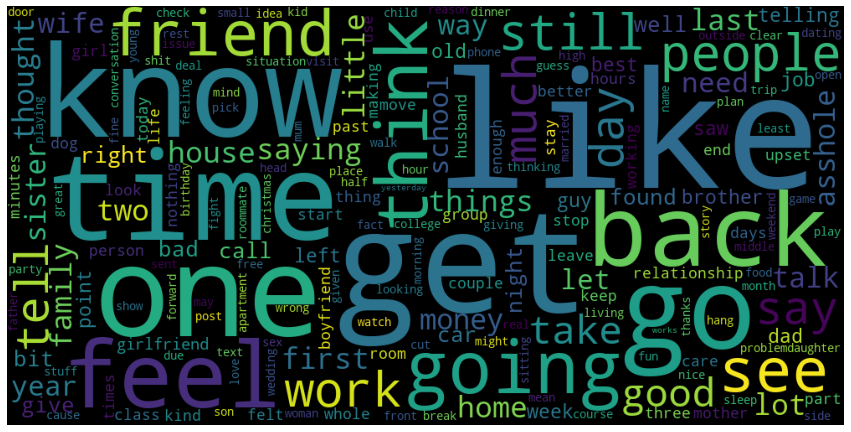

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(wordcloud_TP)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('TP.png', bbox_inches='tight')
plt.close()

In [41]:
test_results_TN = test_results[test_results['Actual Verdict']==0][test_results['Predicted Verdict']==0]
test_results_TN

C:\ProgramData\Anaconda3\envs\cs7643\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Text,Actual Verdict,Predicted Verdict,Logits,text
0,0,My boyfriend and I have been together for arou...,0,0,0.067015,"[my, boyfriend, and, i, have, been, together, ..."
1,1,"So for my birthday, I asked my boyfriend to bu...",0,0,0.065381,"[so, for, my, birthday,, i, asked, my, boyfrie..."
2,2,I am a university student. We are currently tr...,0,0,0.054485,"[i, am, a, university, student., we, are, curr..."
3,3,"Background: So, I've always been afraid of pre...",0,0,0.276775,"[background:, so,, i've, always, been, afraid,..."
5,5,My mom's car is a bit fragile and it needs mai...,0,0,0.048608,"[my, mom's, car, is, a, bit, fragile, and, it,..."
...,...,...,...,...,...,...
9755,9755,Tl;dr at the bottom \n\nMy sister is a single ...,0,0,0.179452,"[tl;dr, at, the, bottom, my, sister, is, a, si..."
9756,9756,"On mobile, so apologies for format.\n\nMy aunt...",0,0,0.049375,"[on, mobile,, so, apologies, for, format., my,..."
9757,9757,So my boss called to talk to me about a new cl...,0,0,0.258829,"[so, my, boss, called, to, talk, to, me, about..."
9758,9758,I’m a 24 year old guy and I had a psychotic ep...,0,0,0.296736,"[i’m, a, 24, year, old, guy, and, i, had, a, p..."


In [66]:
wordcloud_TN = Counter({k:v for k,v in Counter([word for rowlist in test_results_TN['text'].tolist() for word in rowlist]).items() if k not in stop}).most_common()
wordcloud_TN = Counter({pair[0]:pair[1] for pair in wordcloud_TN if pair[0] in nouns})
wordcloud_TN

Counter({'like': 7335,
         'get': 6014,
         'one': 4593,
         'time': 4137,
         'know': 3891,
         'go': 3864,
         'feel': 3573,
         'going': 3248,
         'back': 3113,
         'friend': 2660,
         'think': 2588,
         'people': 2559,
         'still': 2544,
         'work': 2540,
         'family': 2463,
         'see': 2158,
         'much': 2102,
         'tell': 2044,
         'last': 2036,
         'things': 2031,
         'take': 1970,
         'day': 1958,
         'two': 1924,
         'say': 1891,
         'home': 1867,
         'first': 1814,
         'year': 1757,
         'saying': 1740,
         'good': 1642,
         'asshole': 1627,
         'house': 1594,
         'lot': 1592,
         'way': 1562,
         'money': 1558,
         'little': 1548,
         'dad': 1495,
         'sister': 1488,
         'let': 1434,
         'call': 1385,
         'talk': 1348,
         'need': 1326,
         'right': 1308,
         'thought': 13

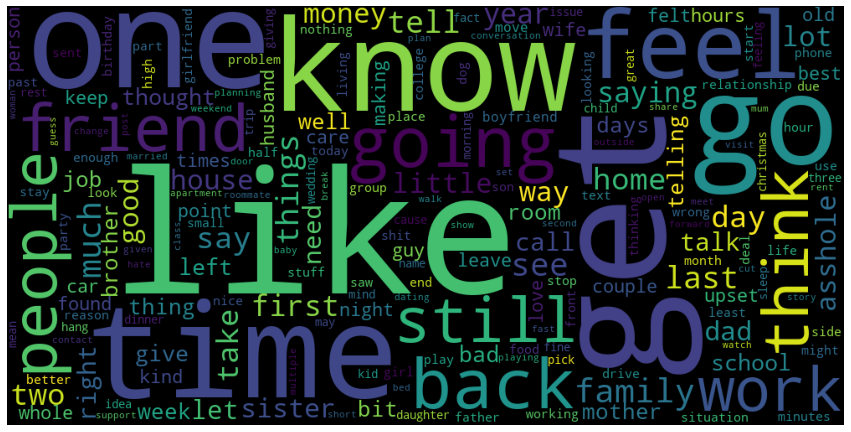

In [67]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(wordcloud_TN)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('TN.png', bbox_inches='tight')
plt.close()

In [81]:
#PARTS OF THE FOLLOWING CODE ARE REFERENCED FROM :https://buhrmann.github.io/tfidf-analysis.html

def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=20):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_in_doc(Xtr, features, row_id, top_n=20):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def get_top_mean_fts_corpus(corpus):

    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(corpus)
    features = vectorizer.get_feature_names()
    print(top_mean_feats(X,features))

In [104]:
get_top_mean_fts_corpus(test_results_TP['Text'].tolist())


       feature     tfidf
0         wife  0.013198
1       sister  0.013105
2          mom  0.013059
3       friend  0.011604
4      friends  0.011216
5        money  0.011021
6          dog  0.010586
7         just  0.010552
8    boyfriend  0.010501
9          car  0.010403
10     brother  0.009534
11         job  0.009198
12        said  0.009198
13      school  0.008901
14     parents  0.008834
15        kids  0.008831
16  girlfriend  0.008721
17         dad  0.008600
18       house  0.008529
19       x200b  0.008375


In [105]:
get_top_mean_fts_corpus(test_results_TN['Text'].tolist())

    feature     tfidf
0       mom  0.013625
1    friend  0.011677
2    sister  0.011442
3       dad  0.010284
4    family  0.010106
5   friends  0.008785
6       dog  0.008670
7      wife  0.008495
8      kids  0.008472
9       car  0.008461
10    money  0.008331
11    x200b  0.008252
12  brother  0.008101
13  parents  0.007982
14  husband  0.007741
15     work  0.007703
16     said  0.007672
17     just  0.007244
18    house  0.007058
19   mother  0.006777


In [106]:
get_top_mean_fts_corpus(test_results_FP['Text'].tolist())


    feature     tfidf
0       mom  0.013738
1       dad  0.012654
2    friend  0.012429
3    sister  0.011354
4      work  0.009949
5   friends  0.009890
6       dog  0.009712
7   brother  0.009398
8   parents  0.009344
9   husband  0.009303
10     room  0.008666
11     kids  0.008590
12      car  0.008588
13     wife  0.008445
14   family  0.008188
15  wedding  0.007982
16    money  0.007841
17   mother  0.007789
18      don  0.007508
19     said  0.007096


In [107]:
get_top_mean_fts_corpus(test_results_FN['Text'].tolist())

       feature     tfidf
0       friend  0.012681
1      friends  0.012311
2         wife  0.010845
3       sister  0.010491
4          dog  0.010380
5        x200b  0.009759
6      brother  0.009466
7          car  0.008796
8         said  0.008410
9          mom  0.008386
10       money  0.008260
11        just  0.008166
12        work  0.007771
13   boyfriend  0.007708
14  girlfriend  0.007675
15         dad  0.007632
16     husband  0.007390
17         son  0.007300
18    daughter  0.007289
19      family  0.007159
